# Simulador de colas en cine

### Complementos necesarios

In [2]:
pip install simpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Librerias

In [3]:
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from math import factorial

# ESTABLECIMIENTO DE PARAMETROS

## Cantidad de clientes=>

In [4]:
num_personas = 50

## Cantidad de Servidores =>

In [5]:
num_servidores = 4

## Maximo y minimo tiempo de decision de compra por cliente=>

In [6]:
min_nivel_paciencia=1
max_nivel_paciencia=2

## Rango de edad=>

In [7]:
min=18
max=80

## Tiempo maximo de cobro por parte del empleado=>

In [8]:
tiempo_general_empleado=5

## Tiempo estimado de llegada por cliente=>

In [9]:
tiempo_llegada=5

## Validacion tiempo de llegada (Obligatorio)

In [10]:
def print_g(text):
    display(HTML(f'<h1><span style="color:green">{text}</span></h1>'))

def print_r(text):
    display(HTML(f'<h1><span style="color:red">{text}</span></h1>'))

def validar_tiempo_llegada(tiempo_llegada):
    resultado = "NO ES VALIDO" if ((1 / tiempo_llegada) / (1 / (2 + tiempo_general_empleado + max_nivel_paciencia))) >= 2 else "VALOR VALIDO"
    
    if "VALOR VALIDO" in resultado:
        print_g(resultado)
    else:
        print_r(resultado)
validar_tiempo_llegada(tiempo_llegada)

#### Creacion de clientes

In [11]:

class Persona:
    ultimo_id = 0
        
    def __init__(self):
        Persona.ultimo_id += 1
        self.id = Persona.ultimo_id
        self.edad = random.randint(min, max)
        self.genero = random.choice(["Femenino", "Masculino"])
        self.nivel_paciencia = random.randint(min_nivel_paciencia, max_nivel_paciencia)
        
    def tiempo_decidir(self):
        return self.edad * 0.02 + self.nivel_paciencia

#### Generacion de n clientes

In [12]:

personas = [Persona() for _ in range(num_personas)]

# Crear DataFrame
df_personas = pd.DataFrame(
    data={
        "Identificacion": [persona.id for persona in personas],
        "Edad": [persona.edad for persona in personas],
        "Genero": [persona.genero for persona in personas],
        "Nivel_Paciencia": [persona.nivel_paciencia for persona in personas],
        "Tiempo_Decidir (min)": [persona.tiempo_decidir() for persona in personas]
    }
)

In [13]:
df_personas

,Identificacion,Edad,Genero,Nivel_Paciencia,Tiempo_Decidir (min)
0,1,46,Masculino,2,2.92
1,2,25,Masculino,1,1.50
2,3,69,Femenino,2,3.38
3,4,51,Femenino,1,2.02
4,5,61,Masculino,2,3.22
5,6,22,Femenino,1,1.44
6,7,31,Femenino,1,1.62
7,8,35,Masculino,1,1.70
8,9,61,Femenino,2,3.22
9,10,26,Masculino,2,2.52


#### Creación de empleados

In [14]:
import random

class Empleado:
    ultimo_id = 0
        
    def __init__(self):
        Empleado.ultimo_id += 1
        self.id = Empleado.ultimo_id
        self.experiencia = random.randint(50, 100) / 100  # Genera un número entre 50 y 100 y lo convierte en decimal
        #donde 100:0 experiencia, 99:1 de experiencia, y seguido hasta 50:50 de experiencia.
        self.tiempo_general = tiempo_general_empleado
        
    def tiempo_promedio(self):
        return self.tiempo_general * self.experiencia


# Servidores

#### Generación de empleados en base a los servidores

In [15]:
empleados = [Empleado() for _ in range(num_servidores)]

In [16]:
df_empleados = pd.DataFrame(
    data={
        "Identificacion": [empleado.id for empleado in empleados],
        "Experiencia": [empleado.experiencia for empleado in empleados],
        "Tiempo general de Empleado (min)": [empleado.tiempo_general for empleado in empleados],
        "Tiempo promedio de Empleado (min)": [empleado.tiempo_promedio() for empleado in empleados]
    }
)

In [17]:
df_empleados

,Identificacion,Experiencia,Tiempo general de Empleado (min),Tiempo promedio de Empleado (min)
0,1,0.55,5,2.75
1,2,0.96,5,4.80
2,3,0.61,5,3.05
3,4,0.77,5,3.85


In [18]:
def persona_llega(env, persona, df_empleados, df_resultados):
    tiempo_decision = persona["Tiempo_Decidir (min)"]

    # Seleccionar un empleado al azar
    empleado = df_empleados.sample().iloc[0]

    tiempo_empleado = empleado["Tiempo promedio de Empleado (min)"]

    yield env.timeout(tiempo_decision + tiempo_empleado)

    df_resultados.loc[len(df_resultados)] = [persona["Identificacion"],persona["Genero"], empleado["Identificacion"],persona["Edad"], tiempo_decision + tiempo_empleado]

In [19]:
def simular_cola(df_personas, df_empleados):
    env = simpy.Environment()
    df_resultados = pd.DataFrame(columns=["Id_Persona","Genero", "Id_Empleado","Edad", "Tiempo_Total_Servicio(Ts)"])

    for _, persona in df_personas.iterrows():
        env.process(persona_llega(env, persona, df_empleados, df_resultados))

    env.run(until=100)  # Ajusta este valor según sea necesario

    return df_resultados

In [20]:
df_resultados_simulacion = simular_cola(df_personas, df_empleados)

In [21]:
df_resultados_simulacion=df_resultados_simulacion.sort_values(by="Id_Persona")
df_resultados_simulacion

,Id_Persona,Genero,Id_Empleado,Edad,Tiempo_Total_Servicio(Ts)
22,1,Masculino,3.0,46,5.97
30,2,Masculino,2.0,25,6.30
24,3,Femenino,1.0,69,6.13
6,4,Femenino,3.0,51,5.07
29,5,Masculino,3.0,61,6.27
0,6,Femenino,1.0,22,4.19
15,7,Femenino,4.0,31,5.47
16,8,Masculino,4.0,35,5.55
48,9,Femenino,2.0,61,8.02
17,10,Masculino,3.0,26,5.57


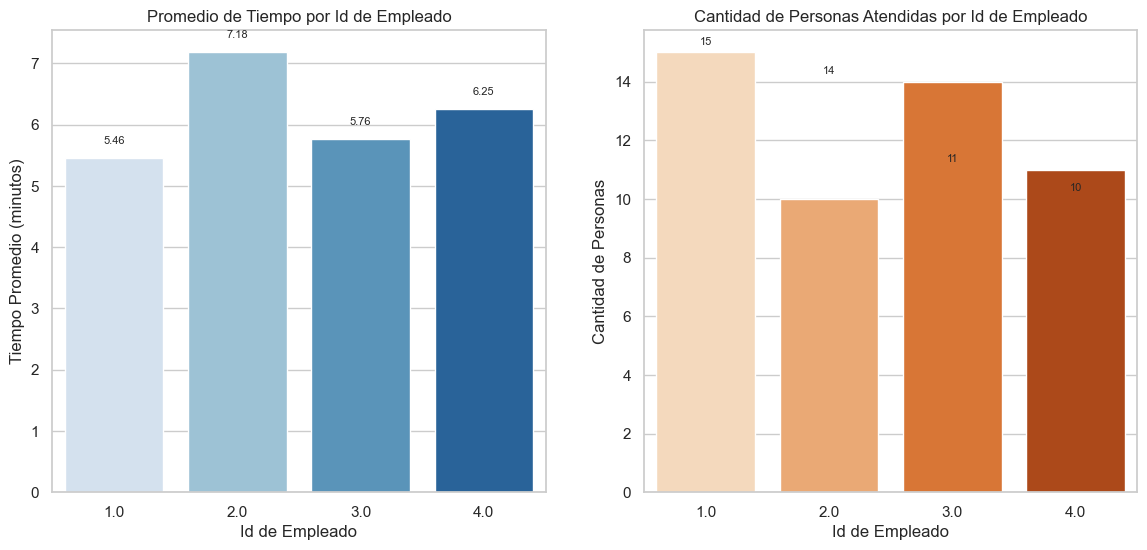

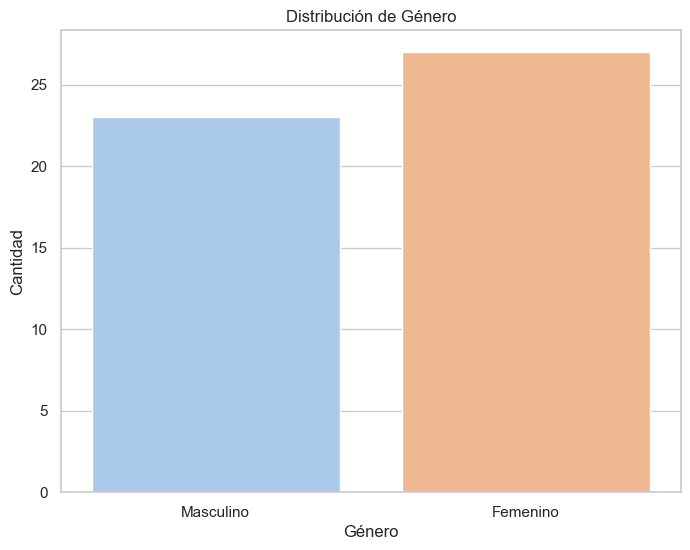

<Figure size 640x480 with 0 Axes>

In [22]:
# Calcular el promedio de tiempo por Id de Empleado
promedio_tiempo = df_resultados_simulacion.groupby('Id_Empleado')['Tiempo_Total_Servicio(Ts)'].mean().reset_index()

# Contar la cantidad de personas atendidas por empleado
cantidad_personas = df_resultados_simulacion['Id_Empleado'].value_counts().reset_index()
cantidad_personas.columns = ['Id_Empleado', 'Cantidad_Personas']

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfica del promedio de tiempo por Id de Empleado
sns.barplot(x='Id_Empleado', y='Tiempo_Total_Servicio(Ts)', data=promedio_tiempo, palette='Blues', ax=axes[0])
axes[0].set_title('Promedio de Tiempo por Id de Empleado')
axes[0].set_xlabel('Id de Empleado')
axes[0].set_ylabel('Tiempo Promedio (minutos)')

# Añadir valores en las barras
for index, value in enumerate(promedio_tiempo['Tiempo_Total_Servicio(Ts)']):
    axes[0].text(index, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Gráfica de la cantidad de personas atendidas por empleado
sns.barplot(x='Id_Empleado', y='Cantidad_Personas', data=cantidad_personas, palette='Oranges', ax=axes[1])
axes[1].set_title('Cantidad de Personas Atendidas por Id de Empleado')
axes[1].set_xlabel('Id de Empleado')
axes[1].set_ylabel('Cantidad de Personas')
plt.savefig('graficos_empleados_personas.png')
# Añadir valores en las barras
for index, value in enumerate(cantidad_personas['Cantidad_Personas']):
    axes[1].text(index, value + 0.2, f'{value}', ha='center', va='bottom', fontsize=8)

# Gráfico de barras para la distribución de género
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Genero', data=df_resultados_simulacion, palette='pastel')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.savefig('grafico_genero.png')
plt.show()
   
plt.tight_layout()

plt.show()

In [23]:
df_resultados_simulacion.to_excel('muestra_datos_resultados.xlsx', index=False)

In [24]:
#-----------------------------------------------------------------------------------------------------------------------
# Calcular el promedio de tiempo por persona
promedio_ServicioCliente = df_resultados_simulacion.groupby('Id_Persona')['Tiempo_Total_Servicio(Ts)'].mean().reset_index()

#Punto 7
promedio_Total_TS= df_resultados_simulacion['Tiempo_Total_Servicio(Ts)'].mean()
#--------------------------------------------------------------------------------------------------------------------------

#print(promedio_ServicioCliente)
print("El promedio del servicio fue de: ", promedio_Total_TS, " min")


El promedio del servicio fue de:  6.064  min


# Calculos

In [25]:
# Funciones para el modelo M/M/1
def mm1_avg_customers(lam, mu):
    rho = lam / mu
    ls = rho / (1 - rho)
    return ls

def mm1_total_time(lam, mu):
    ws = 1 / (mu - lam)
    return ws

def mm1_system_utilization(lam, mu):
    rho = lam / mu
    return rho

def mm1_avg_waiting_customers(lam, mu):
    lq = lam ** 2 / (mu * (mu - lam))
    return lq

def mm1_empty_system_probability(lam, mu):
    p0 = 1 - lam / mu
    return p0

def mm1_probability_n_customers(lam, mu, n):
    rho = lam / mu
    pn = (1 - rho) * (rho ** n)
    return pn

In [26]:
# Funciones para el modelo M/M/S
def mms_avg_customers(lam, mu, s):
    rho = lam / (s * mu)
    numerador = rho ** s * (1 - rho)
    denominador = factorial(s) * (1 - rho)
    ls = numerador / denominador
    return ls

def mms_avg_time(lam, mu, s):
    ls = mms_avg_customers(lam, mu, s)
    ws = ls / lam
    return ws

def mms_avg_waiting_customers(lam, mu, s):
    lq = mms_avg_customers(lam, mu, s) - lam / mu
    return lq

def mms_empty_system_probability(lam, mu, s):
    rho = lam / (s * mu)
    p0_denom = sum([(rho ** n) / factorial(n) for n in range(s)])
    p0 = 1 / (1 + ((rho ** s) / factorial(s)) * p0_denom)
    return p0

def mms_probability_n_customers(lam, mu, s, n):
    rho = lam / (s * mu)
    if n < s:
        pn = (rho ** n) / factorial(n)
    else:
        pn = (rho ** n) / (factorial(s) * (s ** (n - s)))
    return pn

## Ejecucion de formulas


In [27]:
lam=1/tiempo_llegada
mu=1/promedio_Total_TS
s=num_servidores

if num_servidores == 1:
       

        # Calcular todas las métricas
        results = {
            "Número promedio de clientes en el sistema": mm1_avg_customers(lam, mu),
            "Tiempo total en el sistema": mm1_total_time(lam, mu),
            "Utilización del sistema": mm1_system_utilization(lam, mu),
            "Número promedio de clientes en la fila": mm1_avg_waiting_customers(lam, mu),
            "Probabilidad de sistema vacío": mm1_empty_system_probability(lam, mu)
        }

        # Crear DataFrame
        results_df = pd.DataFrame(results, index=["M/M/1"])

        # Mostrar la tabla
        display(results_df)

        # Guardar en Excel
        results_df.to_excel('resultados_modelo.xlsx', index=True)

elif num_servidores >= 2:
        
        # Calcular todas las métricas
        results = {
            "Número promedio de clientes en el sistema": mms_avg_customers(lam, mu, s),
            "Tiempo promedio en el sistema": mms_avg_time(lam, mu, s),
            "Número promedio de clientes en la fila": mms_avg_waiting_customers(lam, mu, s),
            "Probabilidad de sistema vacío": mms_empty_system_probability(lam, mu, s)
        }

        # Crear DataFrame
        results_df = pd.DataFrame(results, index=["M/M/S"])

        # Mostrar la tabla
        display(results_df)

        # Guardar en Excel
        results_df.to_excel('resultados_modelo.xlsx', index=True)

,Número promedio de clientes en el sistema,Tiempo promedio en el sistema,Número promedio de clientes en la fila,Probabilidad de sistema vacío
M/M/S,0.000352,0.001761,-1.212448,0.999524


In [ ]:
#"Estamos monitoriando cómo los clientes se mueven entre diferentes áreas del cine como: 
#"Entrada","Boletería" y "Sala de Proyección". 
#se Registran cada vez que un cliente se desplaza de una área a otra,generando una secuencia de estados como;
#"Entrada", "Boletería", "Sala de Proyección", "Boletería", "Sala de Proyección", "Sala de Proyección", etc.
#Entonces aplicamos este proceso a una cadena de Markov:

#Mapeo de Estados: 
#1. Asignas números a las áreas del cine, por ejemplo, "Entrada"=0.5, "Boletería"=0.25, "Sala de Proyección"=0.25.
#Conteo de Transiciones: 
#2. Contamos cuántas veces un cliente se mueve de un área a otra. 
#Por ejemplo, si hay 3 transiciones de "Entrada" a "Boletería", anotamos ese número.
#3 Probabilidades: se calcula las probabilidades de transición. 
#Si hay 3 transiciones de "Entrada" a "Boletería" y un total de 5 movimientos desde "Entrada", la probabilidad es 3/5.
#Estado Inicial: El último lugar que el cliente visita en tu observación se convierte en el estado inicial para la cadena de Markov. 
#Si la última transición registrada fue de "Sala de Proyección", entonces "Sala de Proyección" sería tu estado inicial.

#Este proceso ayuda a entender cómo los clientes se desplazan dentro del cine y proporciona información para prever futuros movimientos, 
#lo que podría ser útil para optimizar la distribución de servicios y reducir las colas."
#Primera Fila: 0.4 0.3 0.3
#Segunda Fila: 0.2 0.5 0.3
#Tercera Fila: 0.4 0.3 0.3
#estado inicial: 2

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def matriz_transicion():
    print("Ingrese la matriz de probabilidad de transición (por filas):")
    P = []
    try:
        for i in range(3):
            fila = list(map(float, input(f"Fila {i + 1}: ").split()))
            # Verifica que la fila tenga la misma longitud
            if len(fila) != 3:
                raise ValueError("La fila debe tener 3 elementos.")
            # Verifica que las probabilidades sumen 1
            if not np.isclose(np.sum(fila), 1):
                raise ValueError("Las probabilidades en la fila deben sumar 1.")
            P.append(fila)
    except ValueError as e:
        print(f"Error: {e}")
        return matriz_transicion()
    return np.array(P)

def simular_cadena_markov(P, estado_inicial, periodos):
    estados = [estado_inicial]
    for _ in range(periodos):
        nuevo_estado = np.random.choice(range(len(P)), p=P[estados[-1]])
        estados.append(nuevo_estado)
    return estados

def mostrar_resultados(P, estado_inicial, periodos):
    # Mostrar matriz de probabilidad de transición
    print("\nMatriz de probabilidad de transición:")
    print(P)

    # Crear y mostrar diagrama de transición
    G = nx.DiGraph()
    for i in range(len(P)):
        for j in range(len(P[i])):
            if P[i, j] > 0:
                G.add_edge(f'E{i+1}', f'E{j+1}', weight=P[i, j])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Diagrama de Transición")
    plt.show()

    # Mostrar vector de estado inicial
    print("\nVector de estado inicial:")
    print(f"E{estado_inicial + 1} -> 1, Resto -> 0")

    # Calcular y mostrar vector para el periodo 2
    resultados_simulacion = simular_cadena_markov(P, estado_inicial, periodos)
    vector_periodo_2 = np.zeros(len(P))
    vector_periodo_2[resultados_simulacion[1]] = 1
    print("\nVector para el periodo 2:")
    print(vector_periodo_2)

def main():
    # Configuración inicial
    P = matriz_transicion()
    estado_inicial = int(input("Ingrese el estado inicial (1, 2 o 3): ")) - 1  # Ajusta el índice del estado inicial
    periodos = 2  # Siempre calcularemos el vector para el periodo 2

    # Mostrar resultados
    mostrar_resultados(P, estado_inicial, periodos)

if __name__ == "__main__":
    main()


In [ ]:
#Metodo de Productos Medios : 
#Se usa para recomendar las peliculas que estan en estreno estas 
#con un numero pseudoaletorio , toma digitos centrales y normaliza 
#calculando el indice y dando una lista de peliculas recomendadas.

In [ ]:
def productos_medios(seed1, seed2, n, total_peliculas):
    resultados = []

    for _ in range(n):
        # Calcula el siguiente número pseudoaleatorio
        producto = seed1 * seed2
        # Toma los dígitos centrales y normaliza
        numero_pseudoaleatorio = int(str(producto)[len(str(producto)) // 2 - 1: len(str(producto)) // 2 + 1])
        numero_normalizado = numero_pseudoaleatorio / 100.0
        # Calcula el índice de película recomendada
        indice_pelicula = int(numero_normalizado * total_peliculas)
        
        resultados.append(indice_pelicula)

        # Actualiza las semillas para la siguiente iteración
        seed1, seed2 = seed2, numero_pseudoaleatorio

    return resultados

# Solicitar al usuario la lista de películas
num_peliculas = int(input("Ingrese el número total de películas: "))
peliculas = [input(f"Ingrese el nombre de la película {i + 1}: ") for i in range(num_peliculas)]

# Ejemplo con semillas iniciales 23 y 17, generando 5 números pseudoaleatorios
semilla1 = 23
semilla2 = 17
num_resultados = 5

resultados = productos_medios(semilla1, semilla2, num_resultados, num_peliculas)

# Mostrar las películas recomendadas
print("\nPelículas Recomendadas:")
for indice in resultados:
    print(f"- {peliculas[indice]}")


In [ ]:
#Métodos Congruenciales MIXTO
#se usa como base para dar al cliente la opcion de sentarse en algun asiento ya que algunas entradas estan ya vendidas
#los asientos los cuales se llaman Vc ya que los otros sientos estan  ya ocupados de igual forma el cliente puede decidir en 
#cual asiento quiere estar.


In [ ]:
pip install colorama

In [ ]:
import random
from colorama import init, Fore

init(autoreset=True)  # Inicializar colorama

def congruential_mix(seed, a, c, m, num_randoms):
    random_sequence = [seed]
    for _ in range(num_randoms):
        next_random = (a * random_sequence[-1] + c) % m
        random_sequence.append(next_random)
    return random_sequence[1:]  # Excluir la semilla inicial

def generar_matriz_asientos(filas, columnas):
    matriz = [['[ {} ]'.format(chr(65 + j) + str(i + 1)) for j in range(columnas)] for i in range(filas)]

    # Modificar la representación para que se parezca a un tablero de ajedrez
    for i in range(filas):
        for j in range(columnas):
            if (i + j) % 2 == 1:
                matriz[i][j] = '[ VC ]' if '[ E' not in matriz[i][j] else '[ VC ]'

    return matriz

def mostrar_matriz_asientos(matriz):
    # Imprimir números de columna
    print("   " + " ".join(str(i + 1) for i in range(len(matriz[0]))))
    for i, fila in enumerate(matriz):
        # Imprimir letra de fila y asientos
        print(chr(65 + i) + " " + " ".join(Fore.RED + str(asiento) + Fore.RESET if '[ E' in asiento else str(asiento) for asiento in fila))

def asignar_asiento(matriz, fila, columna, espectador):
    matriz[fila][columna] = f'[ {espectador} ]'

def seleccionar_asientos_manual(matriz, num_asientos, secuencia_aleatoria):
    asientos_seleccionados = []
    for _ in range(num_asientos):
        while True:
            print("\nSeleccione asiento para el próximo espectador:")
            mostrar_matriz_asientos(matriz)
            fila = int(input("Ingrese el número de fila (1 a {}): ".format(len(matriz)))) - 1
            columna = int(input("Ingrese el número de columna (1 a {}): ".format(len(matriz[0])))) - 1

            if 0 <= fila < len(matriz) and 0 <= columna < len(matriz[0]):
                if '[ E' not in matriz[fila][columna]:
                    break
                else:
                    print("¡El asiento ya está ocupado!")
                    opcion = input("¿Desea ingresar otro asiento? (Sí/No): ").lower()
                    if opcion != 'si':
                        return asientos_seleccionados
            else:
                print("¡Número de fila o columna fuera de rango! Inténtelo de nuevo.")

        asientos_seleccionados.append((fila, columna))
        asignar_asiento(matriz, fila, columna, f"E{len(asientos_seleccionados)}")

    return asientos_seleccionados

# Ejemplo de uso
num_filas = 5
num_columnas = 5

matriz_asientos = generar_matriz_asientos(num_filas, num_columnas)

# Se utiliza el método congruencial para generar una secuencia pseudoaleatoria
secuencia_aleatoria = congruential_mix(123, 5, 7, 50, num_filas * num_columnas)

num_espectadores = int(input("Ingrese la cantidad de espectadores: "))
asientos_seleccionados = seleccionar_asientos_manual(matriz_asientos, num_espectadores, secuencia_aleatoria)

print("\nMatriz de Asientos después de la asignación:")
mostrar_matriz_asientos(matriz_asientos)
print("\nAsientos seleccionados:")
for i, (fila, columna) in enumerate(asientos_seleccionados):
    print(f"Espectador {i + 1}: {chr(65 + columna)}{fila + 1}")


In [ ]:
#Prueba de Kolmogorov-Smirnov

In [ ]:
#Importar bibliotecas:
#from scipy.stats import kstest: Importa la función kstest de la biblioteca scipy.stats para realizar la prueba de Kolmogorov-Smirnov.
#import numpy as np: Importa la biblioteca numpy como np para manipulación de arreglos y cálculos numéricos.

In [ ]:
pip install scipy


In [ ]:
#Ejemplo de Uso:
#Supongamos que tenemos una muestra de tiempos de duración de películas en minutos y deseas verificar si estos 
#tiempos siguen una distribución uniforme.
#Ingresamos los datos separados por espacios: 120 110 130 115 125
#Ingresamos el nivel de significancia (por ejemplo, 0.05): 0.05
#El código calculará la estadística de prueba D, realizará la prueba de hipótesis y te informará si puedes o no rechazar 
#la hipótesis nula de que los tiempos de duración siguen una distribución uniforme, con un nivel de significancia del 0.05.

In [ ]:
from scipy.stats import kstest
import numpy as np

def kolmogorov_smirnov_test(data):
    # Ordenar los datos
    sorted_data = np.sort(data)
    
    # Calcular la función de distribución acumulativa empírica (Sn(x))
    empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Calcular la estadística de prueba D
    D_plus = np.max(empirical_cdf - sorted_data)
    D_minus = np.max(sorted_data - (empirical_cdf - 1/len(sorted_data)))
    D = max(D_plus, D_minus)
    
    return D

# Obtener datos del usuario
user_data = input("Ingrese los datos separados por espacios: ")
data = np.array([float(x) for x in user_data.split()])

# Obtener el nivel de significancia del usuario
alpha = float(input("Ingrese el nivel de significancia (por ejemplo, 0.05): "))

# Realizar la prueba de Kolmogorov-Smirnov
D_statistic = kolmogorov_smirnov_test(data)

# Imprimir el resultado
print(f"Estadística de prueba D: {D_statistic}")

# Realizar la prueba de hipótesis
result, p_value = kstest(data, 'uniform')
print(f"P-valor: {p_value}")

if p_value > alpha:
    print(f"No se puede rechazar la hipótesis nula a un nivel de significancia de {alpha}. Los datos siguen una distribución uniforme.")
else:
    print(f"Se rechaza la hipótesis nula a un nivel de significancia de {alpha}. Los datos no siguen una distribución uniforme.")


In [ ]:
#Prueba Chi2
#ingresar_datos(): Esta función solicita al 
#usuario ingresar el número de categorías para género y número de boletos, y 
#luego recoge los datos específicos para cada combinación de categorías.

#realizar_prueba_chi2(data): Esta función toma los datos ingresados, 
#calcula los grados de libertad, realiza la prueba de Chi² y muestra los resultados, 
#incluyendo si se debe aceptar o rechazar la hipótesis nula, el estadístico Chi², el valor crítico de Chi² y el p-valor.

In [ ]:
# import numpy as np
from scipy.stats import chi2_contingency

def ingresar_datos():
    num_generos = int(input("Ingrese el número de categorías para género: "))
    num_boletos = int(input("Ingrese el número de categorías para número de boletos: "))

    data = np.zeros((num_generos, num_boletos), dtype=int)

    for i in range(num_generos):
        for j in range(num_boletos):
            mensaje = f"Ingrese el número de clientes para {i+1}ª categoría de género y {j+1}ª categoría de boletos: "
            data[i, j] = int(input(mensaje))

    return data

def realizar_prueba_chi2(data):
    degrees_of_freedom = (data.shape[0] - 1) * (data.shape[1] - 1)

    chi2_stat, p_value, _, _ = chi2_contingency(data)

    critical_value = chi2_contingency(np.ones_like(data))[0]

    reject_null = chi2_stat > critical_value

    print("\nResultados de la Prueba de Chi²:")
    if reject_null:
        print("Rechazar la hipótesis nula. Hay una diferencia significativa.")
    else:
        print("Aceptar la hipótesis nula. No hay evidencia de diferencia significativa.")

    print(f"Chi² Estadístico: {chi2_stat}")
    print(f"Valor Crítico de Chi²: {critical_value}")
    print(f"P-valor: {p_value}")
    print(f"Grados de Libertad: {degrees_of_freedom}")
    


if __name__ == "__main__":
    datos = ingresar_datos()

    realizar_prueba_chi2(datos)
